In [2]:
#importing the necessary libraries needed for our program
import matplotlib.pyplot as plt #to plot the directed graph
import networkx as nx #to create the directed graph
import numpy as np #to work with arrays
G = nx.DiGraph() #we initialize the directed graph in variable G

In [3]:
edges = [] #these are the list of the edges that the user will put
condition = 1
while(condition):
    i = input() #take input of the edge from the user
    inp = tuple(map(int,i.split())) #turn it into a tuple using map function
    if(inp): #check if user has given an input or not
        edges.append(inp) #if yes, append the input in the edge list
    else:
        condition = 0 #else stop the loop

4 1
1 2
1 3
2 3
3 2



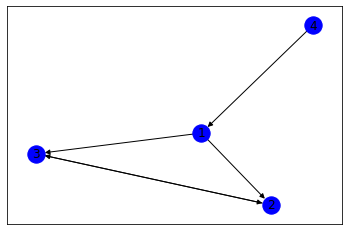

In [4]:
G.add_edges_from(edges) #add the edges to the graph
nx.draw_networkx(G, with_labels = True, node_color = "blue") #display the graph

In [5]:
d = float(input("enter damping factor ")) #take the input of the damping from the user
iterations =  int(input("enter no. of iterations ")) #take the input for iterations
print(d, iterations)

enter damping factor 0.85
enter no. of iterations 52
0.85 52


In [6]:
prefer = [list(G.predecessors(i+1)) for i in range(G.number_of_nodes())] #G.predecessors get the nodes which refer 
                                                                         #to the node mentioned. prefer get the predecessors
                                                                         #of every node in ascending order
print(prefer)

[[4], [1, 3], [1, 2], []]


In [7]:
pageRankings = np.ones(G.number_of_nodes(), dtype = float) #initiating the pr of every page with one using np.ones
print(pageRankings)

[1. 1. 1. 1.]


In [8]:
def pr(i): #function to get pr of a page i
    l = list(G.predecessors(i)) #get all the pages referring to the page i
    pagesReffered = 0
    for i in l:
        pagesReffered += pageRankings[i-1]/G.out_degree()[i] #get the value of pagesReffered as the pr of pages referring to i
                                                             #divided by their outlinks which we get from G.out_degree()
    return ((1-d) + d*(pagesReffered)) #apply the formula of pr and return the value

In [9]:
#first iteration
for i in range(G.number_of_nodes()):
    pageRankings[i] = pr(i+1)

In [10]:
print(pageRankings) #after one iteration

[1.      1.425   1.78625 0.15   ]


In [11]:
for _ in range(iterations): #apply the same for the number of iterations specified by the user
    for i in range(G.number_of_nodes()):
        pageRankings[i] = pr(i+1)

In [12]:
print(pageRankings) #final pageRankings of the pages

[0.2775  1.78625 1.78625 0.15   ]


In [13]:
def wpr(u): #function to calculate weighted average
    l = list(G.predecessors(u))
    pagesReffered = 0
    for v in l:
        win = G.in_degree()[u]/sum([G.in_degree()[i] for i in G.successors(v)]) #to calculate Win of the referring pages
                                                                                #in_degree(inlinks) of the page u/sum of 
                                                                                #in_degree(inlinks) of the referred pages of v
        wout = G.out_degree()[u]/sum([G.out_degree()[i] for i in G.successors(v)]) #to calculate Wout of the referring pages
                                                                                #out_degree(outlinks) of the page u/sum of 
                                                                                #out_degree(outlinks) of the referred pages of v
        pagesReffered += pageRankings[v-1]*win*wout #multiply it with the pr of v
    return ((1-d) + d*(pagesReffered)) #apply the formula of wpr and return it

In [16]:
weightedPageRankings = np.ones(G.number_of_nodes(), dtype = float) #initiating the wpr of every page with one using np.ones
print(weightedPageRankings)

[1. 1. 1. 1.]


In [17]:
#first iteration
for i in range(G.number_of_nodes()-1):
    weightedPageRankings[i+1] = wpr(i+2)

In [18]:
print(weightedPageRankings) #after one iteration

[1.         1.72728125 1.72728125 0.15      ]


In [21]:
for _ in range(iterations): #apply the same for the number of iterations specified by the user
    for i in range(G.number_of_nodes()):
        weightedPageRankings[i] = wpr(i+1)

In [22]:
print(weightedPageRankings)

[0.2775     1.72728125 1.72728125 0.15      ]
